# Tutorial - Optimization Problem
---
This tutorial will study some certain cases.  All of them can be viewed as searching groundstate(s) of some Hamiltonian.

## Ising model

#### Definition of the problem

A $3\times 3$ spin lattice is governed the Hamiltonian 

$$ H = \sum_{\mbox{i and j are neighbors}}Z_iZ_j .$$

The aim is to find out the spin configuration to minimize the Hamiltonian. No periodic boundary in this case.

#### Map the problem

The key is to set a proper connection on a _phalanx_ annealer.

In [1]:
from phalanx import Annealer

beta = 10.  # A large beta can highlight the groundstate.
num_qubits = 9
ism = Annealer(beta, num_qubits)

On this $3\times 3$ lattice, we use qubit 0~8 to denote each spin.  For example, 3 corresponds to the spin in the second row and the first column.  From the Hamiltonian, we can infer its connection.

In [2]:
connection = [
    [0,1,0,1,0,0,0,0,0],
    [0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0],
]
ism.set_connection(connection)

check the connection of spins.

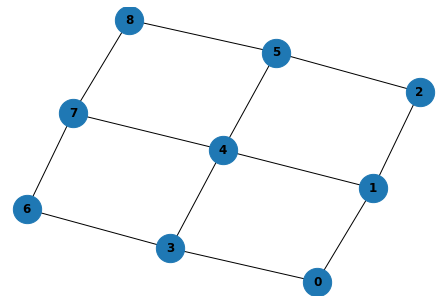

In [3]:
ism.draw_topology()

#### The spin configurtion minimize the Hamiltonian

After an annealing process, the Ising model should be captured as groundstate with a high probability.

In [4]:
for i in range(20):
    print('measurement '+str(i)+':', ism.measure())

measurement 0: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 1: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 2: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 3: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 4: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 5: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 6: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 7: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 8: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 9: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 10: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 11: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 12: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 13: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 14: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 15: [1, -1, 1, -1, 1, -1, 1, -1, 1]
measurement 16: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 17: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 18: [-1, 1, -1, 1, -1, 1, -1, 1, -1]
measurement 19: [1, -1, 1, -1, 1, -1, 1, -1, 1]


Obviously, there are 2 configurations minimize the Ising model.  We show the last case in a graph.

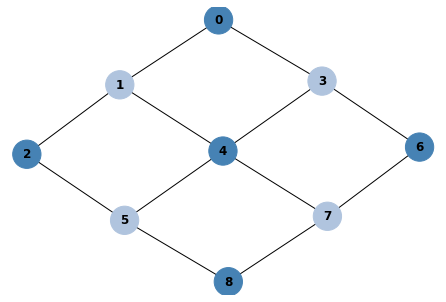

In [5]:
ism.draw_result()

## Quadratic binary value functions

If a quadratic function lives on the domain $\{0,1\}$, _phalanx_ can easily find out its minimum.

#### Problem

$$ f = a + b - c \times d $$

$ a,b,c $ and $d$ can either be $0$ or $1$.  The aim is to find an solution to minimize $f$.

#### Map the problem to an Ising type

By a transformation

$$ s = 2q - 1 $$ 

We can transform $ a,b,c,d $ to $a',b',c',d'$ on the domain $\{-1, 1\}$, then the $f$ comes to an equivalent problem

\begin{align*}
f' &= \frac{a'+1}{2} + \frac{b'+1}{2} - \frac{c'+1}{2} \times \frac{d'+1}{2} \\
  &= \frac{a'+b'}{2} - \frac{c'd'+c'+d'}{4} - 0.75
\end{align*}
 
We just need to minimize $\frac{a'+b'}{2} - \frac{c'd'+c'+d'}{4}$. This can be viewed as an Ising model Hamiltonian.  We fetch 4 qubits to play as the variables, the connection matrix can be set according to the Hamiltonian.

In [6]:
beta = 10.
num_qubits = 4
qbvf = Annealer(beta, num_qubits)

In [7]:
connection = [
    [0.5, 0,   0,     0    ],
    [0,   0.5, 0,     0    ],
    [0,   0,   -0.25, -0.25],
    [0,   0,   0,     -0.25]
]
qbvf.set_connection(connection)

#### Find solution with measurements

In [8]:
for i in range(4):
    print('measurement '+str(i)+':', qbvf.measure())

measurement 0: [-1, -1, 1, 1]
measurement 1: [-1, -1, 1, 1]
measurement 2: [-1, -1, 1, 1]
measurement 3: [-1, -1, 1, 1]


This means $[-1, -1, 1, 1]$ is the point of minimum of $f'$.  By the same transformation, the solution for the original problem $f$ is

$$ [0, 0, 1, 1] $$

which corresponds to the minimum $f=-1$.

## Boolean functions

#### AND gate

AND gate returns a binary number from two binary inputs.  Its truth table is 

| a  | b  | OUT  |
| :--: | :--: | :--: |
|  0   |  0   |  0   |
|  0   |  1   |  0   |
|  1   |  0   |  0   |
|  1   |  1   |  1   |

The aim is to show how to use an annealing process to express this function.  

#### Expression

First, we fetch 2 qubits $q_1$ and $q_2$, then define such a quadratic binary value function

$$ f = aq_1 + q_2 - 4abq_1q_2 $$

$a,b$ are two input values of the AND gate. Since we use 1 and 0 represent qubit states, this function will lead the annealing outcome of $q_2$ as the the output of the AND gate. To see this, we write down the equivalent Hamiltonian for this function with the transformation $s = 2q-1$,

$$ H = (\frac{a}{2}-ab)s_1 + (\frac{1}{2}-ab)s_2 - abs_1s_2 $$

Here $s_1, s_2$ can be $1$ or $-1$. So the connection matrix is 

\begin{bmatrix}
\frac{a}{2}-ab & -ab \\
0 & \frac{1}{2}-ab
\end{bmatrix}

Let's try it with our simulator.

In [9]:
beta = 10.
num_qubits = 2
and_gate = Annealer(beta, num_qubits)

#### For $a=0,b=0$

In [10]:
connection = [
    [0,0],
    [0,0.5]
]
and_gate.set_connection(connection)

(and_gate.measure()[1] + 1) / 2

0.0

#### For $a=0,b=1$

In [11]:
connection = [
    [0,0],
    [0,0.5]
]
and_gate.set_connection(connection)

(and_gate.measure()[1] + 1) / 2

0.0

#### For $a=1,b=0$

In [12]:
connection = [
    [0.5,0],
    [0,0.5]
]
and_gate.set_connection(connection)

(and_gate.measure()[1] + 1) / 2

0.0

#### For $a=1,b=1$

In [13]:
connection = [
    [-0.5,-1],
    [0,-0.5]
]
and_gate.set_connection(connection)

(and_gate.measure()[1] + 1) / 2

1.0

So we successfully build an classical AND gate with our quantum annealer.